### Assignment 2 - Linear Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The dataset is based on Gyódi and Nawaro (2021)’s research on Airbnb prices in European cities. We take a sub dataset of Airbnb listings in Barcelona, Spain during weekdays and intend to build a model to predict listing price using the features.<br>

The variables are as follows.<br>
<b>price</b> ---	Listing price<br>
<b>bedrooms</b> ---	number of bedrooms<br>
<b>person_capacity</b> ---	maximum number of guests<br>
<b>room_private</b> ---	dummy for private rooms<br>
<b>room_shared</b> ---	dummy for shared rooms<br>
<b>cleanliness</b> ---	guest reviews: scale to 10<br>
<b>guest_satisfaction</b> --- guest reviews:scale to 100<br>
<b>superhost</b> ---	dummy for hosts with the superhost status<br>
<b>multi</b> ---	dummy for listings offered by hosts with 2–4 listings<br>
<b>biz</b> ---	dummy for listings offered by hosts with more than 4 listings<br>
<b>dist</b> ---	distance to the city centre in kilometres<br>
<b>metro_dist</b> ---	distance to the closest metro station in kilometres<br>
<b>attr_index</b> ---	attraction index: scale to 100, measuring the accessibility to attractions<br>
<b>rest_index</b> ---	restaurant index: scale to 100, measuring the accessibility to restaurants<br>
<b>lng</b> ---	Longitude of the listing location<br>
<b>lat</b> ---	Latitude of the listing location<br>

Ref:<br> 
Gyódi, K. and L. Nawaro (2021). Determinants of Airbnb prices in European cities: A spatial econometrics approach. Tourism Management, Vol. 86.

1. Import the necessary packages.

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

It will import the necessary package required to perform linear regression in python, and statsmodels module provides classes and functions to estimate different statistical models.

2. Read in the dataset, 'Barcelona.csv'. Display the data.

In [3]:
barcelona = pd.read_csv('Barcelona.csv')
barcelona.head(10)

,price,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index,lng,lat
0,474.317499,1,False,False,4,False,0,1,10,91,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624
1,169.897829,1,False,True,2,True,1,0,10,88,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714
2,161.984779,1,False,True,4,False,0,1,9,88,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859
3,367.956804,1,False,False,3,False,0,1,10,91,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390
4,196.895292,1,False,True,3,False,1,0,9,91,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699
5,330.951661,2,False,False,3,False,0,1,9,100,2.565611,0.701290,13.328889,11.568178,2.18197,41.40842
6,141.271208,1,False,True,3,False,0,1,9,86,1.648304,0.089427,11.676253,18.071120,2.15342,41.37912
7,173.388880,1,False,True,2,False,0,0,9,96,1.474228,0.590519,15.282387,16.570540,2.18195,41.39691
8,225.754649,1,False,True,4,False,1,0,9,84,0.962655,0.356134,26.988334,41.506420,2.17742,41.38050
9,150.580678,1,False,True,2,False,1,0,9,91,1.819600,0.285601,12.310252,17.747751,2.15700,41.37400


The above code chunks will read the dataset 'Barcelona.csv' and will print the result as barcelona.
barcelona.head() will fetch the 1st few rows the dataset,in this case it will fetch the first 10 rows.

3. How many observations? Display the variable names.

In [4]:
# Define the observations i.e., how many rows and colums are there in the 'Barcelona.csv' dataset.
barcelona.shape

(1555, 16)

In [5]:
barcelona.columns

Index(['price', 'bedrooms', 'room_shared', 'room_private', 'person_capacity',
       'superhost', 'multi', 'biz', 'cleanliness', 'guest_satisfaction',
       'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat'],
      dtype='object')

The code chunks provided above will print all the variable names.

4.1 Explore the variable 'price'. First, Let's find out the statistics using describe(). Then we use a graph to explore the distribution. What do you find?

In [6]:
type('price') # class of the variable 'price'.

str

In [7]:
price_stats = barcelona['price'].describe()
price_stats

count    1555.000000
mean      288.391667
std       321.180435
min        69.588289
25%       161.984779
50%       208.532129
75%       335.373659
max      6943.700980
Name: price, dtype: float64

Here, we are exploring the statistical aspect of the variable 'Price'.This calculate the statistics (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for the 'Price' variable using the describe() method.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Price for Airbnbs at Barcelona & Spain')

Text(0.5, 0, 'Price (Euros)')

Text(0, 0.5, 'Frequency')

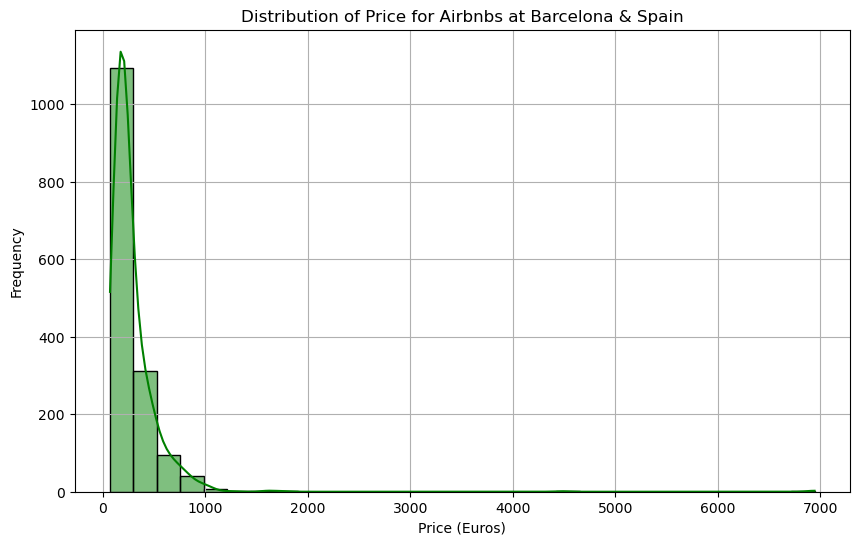

In [8]:
plt.figure(figsize=(10, 6))
custom_colors = ['lightgreen', 'mediumgreen', 'darkgreen', 'green']
sns.histplot(barcelona['price'], bins=30, kde=True, color ='green')
plt.title('Distribution of Price for Airbnbs at Barcelona & Spain')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Bins: 30
#Interpretation: The data range is divided into 30 intervals.
#Visual Effect: The resulting histogram will have 30 bars.

This histogram provides the distribution of the price for the Airbnbs'in Barcelona and Spain,the spread of the histogram indicates the variability in prices across the 'Barcelona.csv dataset'. The graph is skewed to the right (positive skew), suggests that prices are concentrated towards the lower end. This graph is plotted without the removal of outliers.

4.2 We decide to remove the price outliers (defined as three standard deviation away from the mean) and repeat the graph. What do you find?

In [9]:
np.var(barcelona['price']) # variance of the variable 'price'.

103090.53317038735

In [10]:
mean_price = barcelona['price'].mean()
mean_price
# 'mean()' will calculate the average of the price variable.

288.39166706715116

In [11]:
std_dev_price = barcelona['price'].std()
std_dev_price
# 'std()', This code will calculate the standard deviation of the price variable.

321.1804352615852

In [12]:
low_up = barcelona['price'].mean() + 3 * barcelona['price'].std()
low_up

1251.932972851907

The above code chunks will define the upper_bound for identifying outliers.'low_up' contains the upper limit of a 3-sigma confidence interval for the 'price' variable in the 'barcelona' dataset. Any data point above this upper limit may be considered an outlier.

In [13]:
normal_price = barcelona[barcelona['price']<1251.932972851907]
normal_price

,price,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index,lng,lat
0,474.317499,1,False,False,4,False,0,1,10,91,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624
1,169.897829,1,False,True,2,True,1,0,10,88,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714
2,161.984779,1,False,True,4,False,0,1,9,88,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859
3,367.956804,1,False,False,3,False,0,1,10,91,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390
4,196.895292,1,False,True,3,False,1,0,9,91,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,300.928620,1,False,True,2,False,0,0,10,100,2.394839,0.954952,9.709902,12.430326,2.19590,41.39637
1550,769.660437,3,False,False,6,False,0,1,8,84,2.503374,0.554007,9.075307,14.946029,2.19991,41.38834
1551,318.151139,1,False,True,2,True,1,0,9,98,2.619616,0.761843,8.747713,12.276081,2.20066,41.39204
1552,248.562851,1,False,True,2,True,1,0,10,98,2.700091,0.866258,8.538490,11.868058,2.20140,41.39286


In [14]:
normal_price.shape

(1548, 16)

The above code shows that 'price' of the Airbnbs' fall within the range of lower bound and upper bound specified by removing the outliers.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Price (Outliers Removed)')

Text(0.5, 0, 'Price (Euros)')

Text(0, 0.5, 'Frequency')

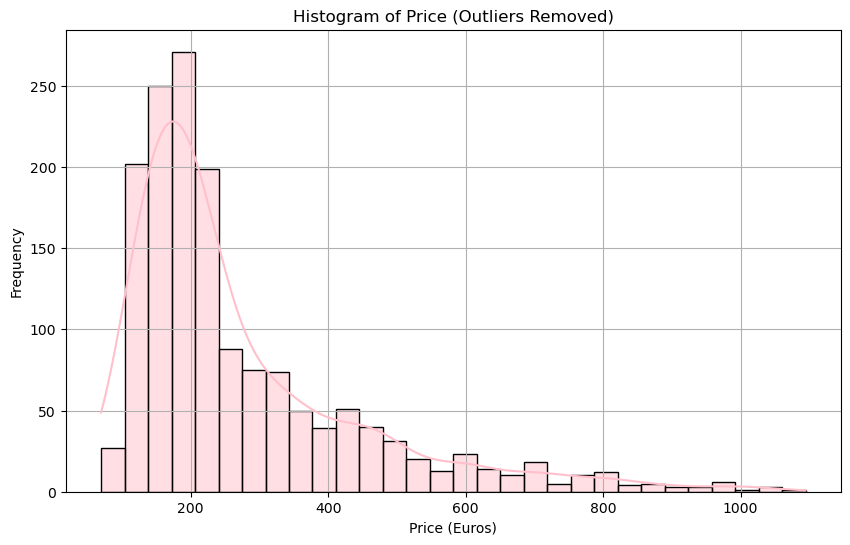

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(normal_price['price'], bins=30, kde=True, color ='pink')
plt.title('Histogram of Price (Outliers Removed)')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This histogram provides the distribution of the prices for Airbnbs'listings in Barcelona and Spain after the outliers has been removed. 

5. How many superhosts are there? Create a graph to display as well.

In [16]:
superhost_count = normal_price['superhost'].value_counts()
superhost_count

superhost
False    1269
True      279
Name: count, dtype: int64

The above code provides the number of counts for superhosts in the dataset. That is the count is 1555 and the datatype is boolean - 'True', 'False'.

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='superhost'>

Text(0.5, 1.0, 'Distribution of Superhost')

Text(0.5, 0, 'Superhost')

Text(0, 0.5, 'Count')

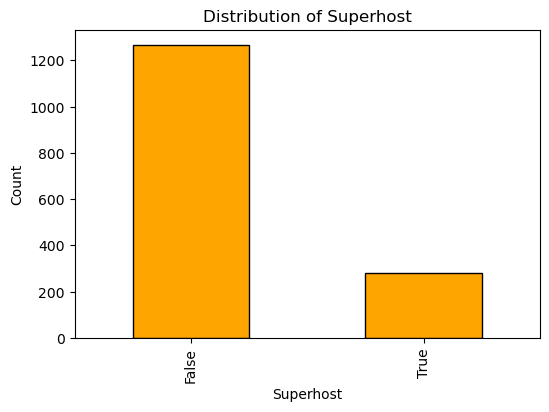

In [17]:
plt.figure(figsize=(6, 4))
superhost_count.plot(kind = 'bar', color ='orange', edgecolor = 'black')
plt.title('Distribution of Superhost')
plt.xlabel('Superhost')
plt.ylabel('Count')
plt.show()

While the value_counts summary gives the exact counts of each superhost, This plot help us understand the distribution of superhost for the Airbnbs in 'Barcelona.csv' dataset.The bar plot provides a visual representation of the count of each superhost. From the graph, the bar plot displays the count of listings categorized as superhosts versus non-superhosts. 

6. Is there possible correlation between the distance to the closest metro station and price?

In [18]:
correlation_coeff = normal_price['metro_dist'].corr(normal_price['price'])
correlation_coeff
# Calculates the correlation coefficient between the variable 'metro_dist' and 'price'.

-0.03942016657108458

The correlation coefficient calculated is -0.03942016657108458, The negative sign of the correlation coefficient indicates a negative correlation. This means that as one variable increases, the other variable tends to decrease slightly. However, the strength of this relationship is almost negligible.The correlation coefficient is very close to 0, indicating an extremely weak correlation. This suggests that distance to the closest metro station (metro_dist) is not a significant factor influencing the price (price) in this dataset. 

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='metro_dist', ylabel='price'>

<Axes: xlabel='metro_dist', ylabel='price'>

Text(0.5, 1.0, 'Scatterplot of Metro Distance vs. Price')

Text(0.5, 0, 'Metro Distance')

Text(0, 0.5, 'Price')

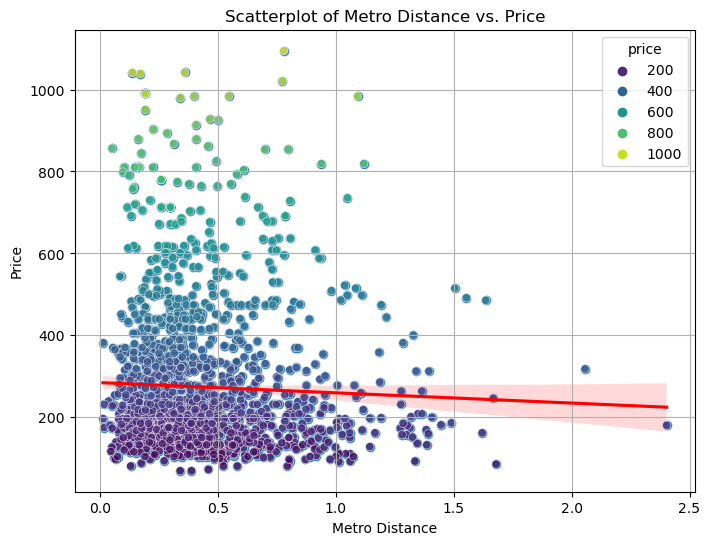

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(x = 'metro_dist',y ='price', data = normal_price, line_kws={'color':'red'})
sns.scatterplot(x='metro_dist', y='price', hue='price', data=normal_price, palette='viridis', alpha=0.7)
plt.title('Scatterplot of Metro Distance vs. Price')
plt.xlabel('Metro Distance')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The code suggests visualizing the relationship between the distance to the closest metro station and the price of listings in Barcelona. The scatterplot with the regression line helps to assess the direction and strength of this relationship between the closest metro station and the price. We can see that the listing price of the Airbnbs' is falling as the distance of the metro station is increasing.

7. Run a linear regression model with the dataset. 'price' is the target variable and all other features (except longitude and latitude) as predictor variables. Follow the steps we have practiced in class. Display the results.<br>
    Hint: You need to turn True/False Boolean variables (room_private, room_shared, and superhost) into 1/0 before applying statsmodels models. You can use .astype(int). Remember to save the changes by assigning the changed outcome back to the variable, such as <i>car['price'] = car['price']/1000</i>.

In [25]:
# Turning True/False Boolean variables (room_private, room_shared, and superhost) into 1/0:
room_private = normal_price['room_private'].astype(int)
room_shared = normal_price['room_shared'].astype(int)
superhost = normal_price['superhost'].astype(int)

# Defining the predictors (dropping the columns: price, longitute and latitude) and target variable
x = normal_price.drop(columns=['price', 'lng', 'lat'])
y = normal_price['price']

# Add a constant term to the predictor variables
x_with_intercept = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y,x_with_intercept)

# Display the results
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     266.7
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:38:59   Log-Likelihood:                -9274.5
No. Observations:                1548   AIC:                         1.858e+04
Df Residuals:                    1534   BIC:                         1.865e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 96.4191     35.751      2.697      0.007      26.294     166.545
bedrooms              38.0055      6.858      5.542      0.000      24.553      51.458
room_shared         -270.6826     35.552     -7.614      0.000    -340.418    -200.947
room_private        -169.8302      9.195    -18.470      0.000    -187.866    -151.794
person_capacity       47.5661      3.574     13.310      0.000      40.556      54.576
superhost             15.5403      6.797      2.286      0.022       2.207      28.873
multi                 -3.8143      6.241     -0.611      0.541     -16.056       8.428
biz                   19.1618      7.005      2.736      0.006       5.422      32.901
cleanliness           -2.7610      3.567     -0.774      0.439      -9.757       4.235
guest_satisfaction     1.5329      0.425      3.609      0.000       0.700       2.366
dist                 -10.6433      3.450     -3.085      0.002     -17.411      -3.876
metro_dist            23.3560     10.040      2.326      0.020       3.662      43.051
attr_index             0.6253      0.387      1.614      0.107      -0.135       1.385
rest_index             0.6377      0.479      1.332      0.183      -0.301       1.577
==============================================================================
Omnibus:                      561.132   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3437.329
Skew:                           1.562   Prob(JB):                         0.00
Kurtosis:                       9.598   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
x # after dropping latitude, longitude and price and turning the boolean value to integer.

,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index
0,1,0,0,4,0,0,1,10,91,1.111996,0.630491,17.942927,20.154890
1,1,0,1,2,1,1,0,10,88,1.751839,0.124017,10.910462,17.484489
2,1,0,1,4,0,0,1,9,88,1.670493,0.080322,11.726595,18.505814
3,1,0,0,3,0,0,1,10,91,1.475847,0.093107,13.634603,20.837357
4,1,0,1,3,0,1,0,9,91,1.855452,0.272486,11.793678,17.440874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,0,1,2,0,0,0,10,100,2.394839,0.954952,9.709902,12.430326
1550,3,0,0,6,0,0,1,8,84,2.503374,0.554007,9.075307,14.946029
1551,1,0,1,2,1,1,0,9,98,2.619616,0.761843,8.747713,12.276081
1552,1,0,1,2,1,1,0,10,98,2.700091,0.866258,8.538490,11.868058


8. Which variables are important to predict the prices? Which are not?

bedrooms, room_shared, room_private, person_capacity, superhost, biz, guest_satisfaction, dist, metro_dist,all have p-value less than 0.05 indicating that they play a significant role in determining the prices of the Airbnbs' in Barcelona.
On the other hand,multi, cleanliness, attr_index,rest_index are considered non-significant variables to predict the variable 'price' for the Airbnbs' in Barcelona & Spain because their p-value is greater than 0.05, and any p-value greater than the significance level we fail to reject the null  hypothesis that the variables do not impact on the prediction of price.

9. Interpret the impact of metro_dist on the price.

The correlation coefficient calculated is a negative sign indicating a negative correlation. This means that as distance to the closest metro station increases, the other variable 'price' tends to decrease slightly. However, the strength of this relationship is almost negligible.The correlation coefficient is very close to 0, indicating an extremely weak correlation. This suggests that distance to the closest metro station (metro_dist) is not a significant factor influencing the price (price) in this dataset. 

10. Interpret the impact of being a superhost.

If the count of superhosts is relatively high, it suggests that being a superhost is common, and it may have a positive impact on factors such as booking frequency, guest satisfaction, and overall listing performance.
On the other hand, if the count of superhosts is low, it suggests that being a superhost is less common, and its impact on listing performance may be less significant compared to other factors.